In [1]:
library(tidyr)

In [2]:
library(dplyr)
library(ggplot2)
# library(ggrepel)
# devtools::install_github("slowkow/ggrepel")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
library(ggrepel)

In [23]:
full.width  <- 6.83
half.width  <- 3.27
full.height <- 9.19

SetGGTheme <- theme_set(
  theme_bw() +
  theme(plot.margin=grid::unit(c(2, 2, 2, 2), 'points')) +
  theme(text = element_text(size=18))
)
SetGGTheme


OpenPDF <- function(filename, width=4.86, height=4.8) {
  path <- file.path(figure.dir, filename)
  cairo_pdf(path, width=width, height=height, bg='white', family='sans')
}

ClosePDF <- function(filename) {
  dev.off()
  path <- file.path(figure.dir, filename)
  embedFonts(path)
}

set.seed(42)

List of 59
 $ line                 :List of 6
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                 :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                 :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 18
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       :Classes 'margin', 'unit'  atomic [1:4] 0 0 0 0
  .. .. ..- attr(*, "valid.unit")= int 8
  .. .. ..- attr(*, "unit")= chr "pt"
  ..$ debug        : logi FALSE
  ..$ inherit.

# Lennard-Jones

In [13]:
lj = 
  readr::read_csv("results/lennard-jones.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  name = col_character(),
  type_smirnoff = col_integer(),
  epsilon_smirnoff = col_double(),
  sigma_smirnoff = col_double(),
  type_bgbg_tip3p = col_character(),
  epsilon_bgbg_tip3p = col_double(),
  sigma_bgbg_tip3p = col_double()
)


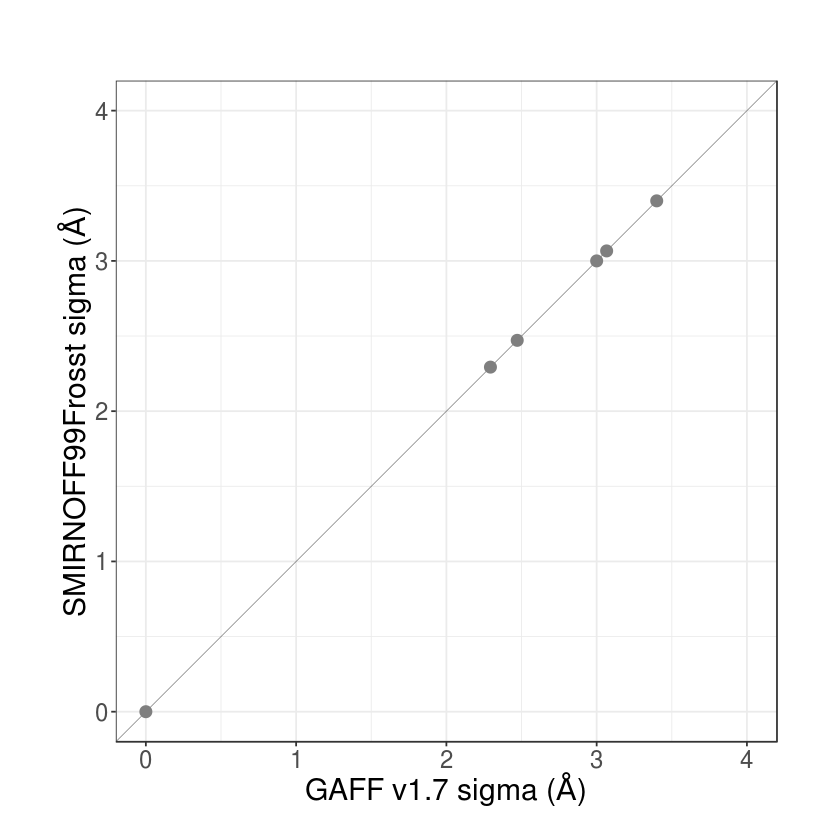

In [18]:
labels <- lj$sigma_smirnoff == lj$sigma_bgbg_tip3p
lj$labels <- ""
lj$labels[!labels] <- paste0(lj$name[!labels])

lj %>%
  ggplot(aes(x = sigma_bgbg_tip3p, y = sigma_smirnoff, label = labels)) + 
  geom_abline(slope = 1, size = 0.1) +
  geom_point(color = ifelse(labels, "grey50", "red"), size=3) +
  geom_text_repel(color = "red", force = 4, nudge_x = 0.2, nudge_y = 0.1, segment.colour = "black") +
  coord_equal() + 
  xlim(NA, 4.0) + 
  ylim(NA, 4.0) +
  labs(subtitle="", 
       x="GAFF v1.7 sigma (Å)", 
       y="SMIRNOFF99Frosst sigma (Å)", 
       title="", 
       caption = "")

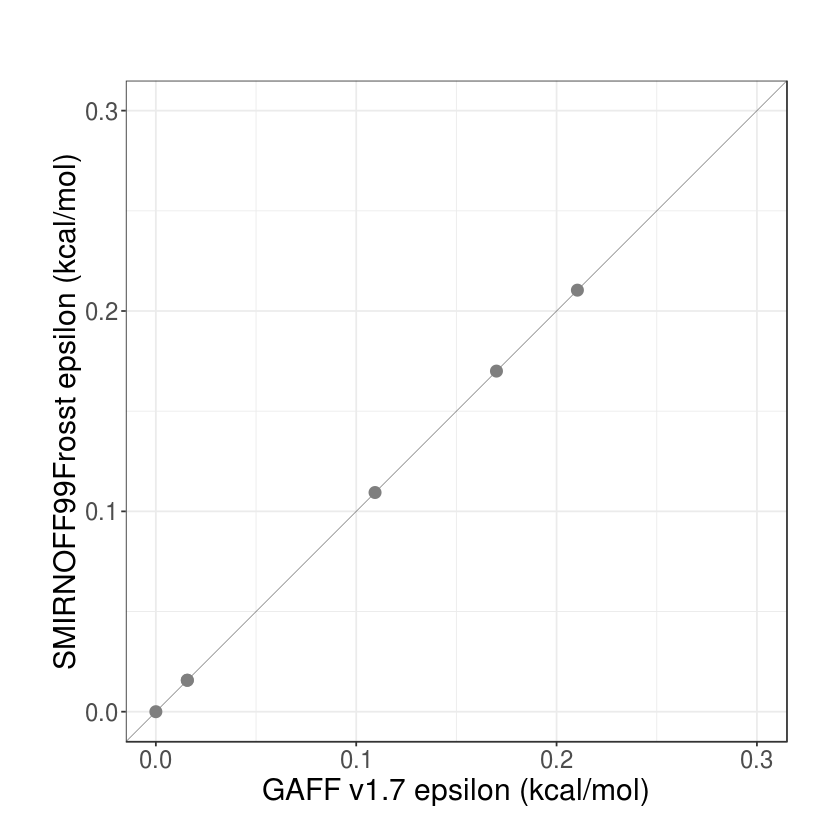

In [19]:

labels <- lj$epsilon_smirnoff == lj$epsilon_bgbg_tip3p
lj$labels <- ""
lj$labels[!labels] <- paste0(lj$name[!labels])

lj %>%
  ggplot(aes(x = epsilon_bgbg_tip3p, y = epsilon_smirnoff, label = labels)) + 
  geom_abline(slope = 1, size = 0.1) +
  geom_point(color = ifelse(labels, "grey50", "red"), size=3) +
  geom_text_repel(color = "red", force = 4, nudge_x = 0.2, nudge_y = 0.1, segment.colour = "black") +
  coord_equal() + 
  xlim(NA, 0.3) + 
  ylim(NA, 0.3) +
  labs(subtitle="", 
       x="GAFF v1.7 epsilon (kcal/mol)", 
       y="SMIRNOFF99Frosst epsilon (kcal/mol)", 
       title="", 
       caption = "")

# Bonds

In [24]:
bonds = 
  readr::read_csv("results/bonds.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  atom1 = col_character(),
  atom2 = col_character(),
  atom1_type_smirnoff = col_integer(),
  atom2_type_smirnoff = col_integer(),
  req_smirnoff = col_double(),
  k_smirnoff = col_double(),
  atom1_type_bgbg_tip3p = col_character(),
  atom2_type_bgbg_tip3p = col_character(),
  req_bgbg_tip3p = col_double(),
  k_bgbg_tip3p = col_double()
)


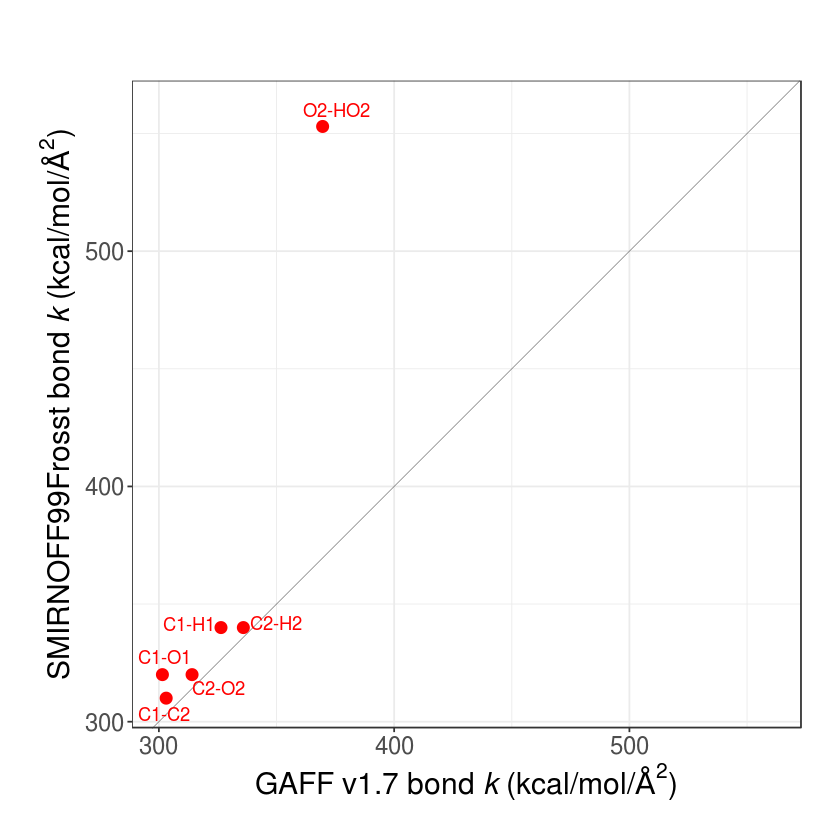

In [36]:
labels <- bonds$k_smirnoff == bonds$k_bgbg_tip3p
bonds$labels <- ""
bonds$labels[!labels] <- paste0(bonds$atom1[!labels], "-", bonds$atom2[!labels])

bonds %>%
  ggplot(aes(x = k_bgbg_tip3p, y = k_smirnoff, label = labels)) + 
  geom_abline(slope = 1, size = 0.1) +
  geom_point(color = ifelse(labels, "grey50", "red"), size=3) +
  geom_text_repel(color = "red", force = 4, nudge_x = 0.2, nudge_y = 0.1, segment.colour = "black") +
  coord_equal() + 
  xlim(NA, 560) + 
  ylim(NA, 560) +
  labs(subtitle="", 
       x=bquote("GAFF v1.7 bond" ~italic(k)~ "(kcal/mol/" *Å^2* ")"), 
       y=bquote("SMIRNOFF99Frosst bond" ~italic(k)~ "(kcal/mol/" *Å^2* ")"), 
       title="", 
       caption = "")

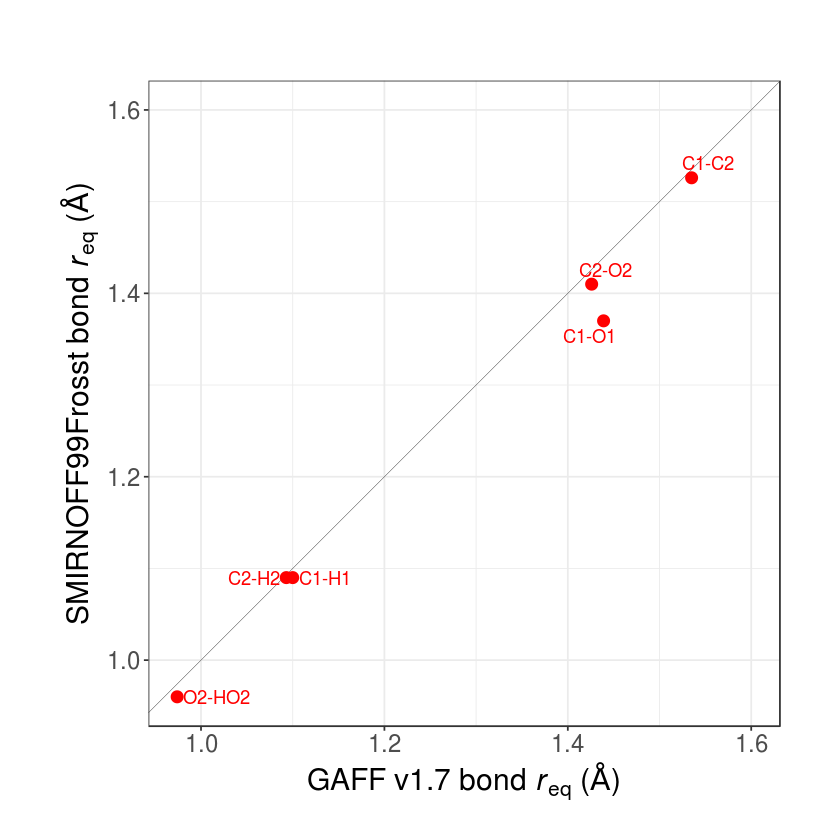

In [49]:
labels <- bonds$req_smirnoff == bonds$req_bgbg_tip3p
bonds$labels <- ""
bonds$labels[!labels] <- paste0(bonds$atom1[!labels], "-", bonds$atom2[!labels])

bonds %>%
  ggplot(aes(x = req_bgbg_tip3p, y = req_smirnoff, label = labels)) + 
  geom_abline(slope = 1, size = 0.1) +
  geom_point(color = ifelse(labels, "grey50", "red"), size=3) +
  geom_text_repel(color = "red", force = 4,  segment.colour = "black") +
  coord_equal() + 
  xlim(NA, 1.6) + 
  ylim(NA, 1.6) +
  labs(subtitle="", 
       x=bquote("GAFF v1.7 bond" ~italic(r)[eq]~ "(" *Å* ")"), 
       y=bquote("SMIRNOFF99Frosst bond" ~italic(r)[eq]~ "(" *Å* ")"), 
       title="", 
       caption = "")

# Angles

In [6]:
angles = 
  readr::read_csv("results/angles.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  atom1 = col_character(),
  atom2 = col_character(),
  atom3 = col_character(),
  k_smirnoff = col_double(),
  theta_eq_smirnoff = col_double(),
  k_bgbg_tip3p = col_double(),
  theta_eq_bgbg_tip3p = col_double()
)


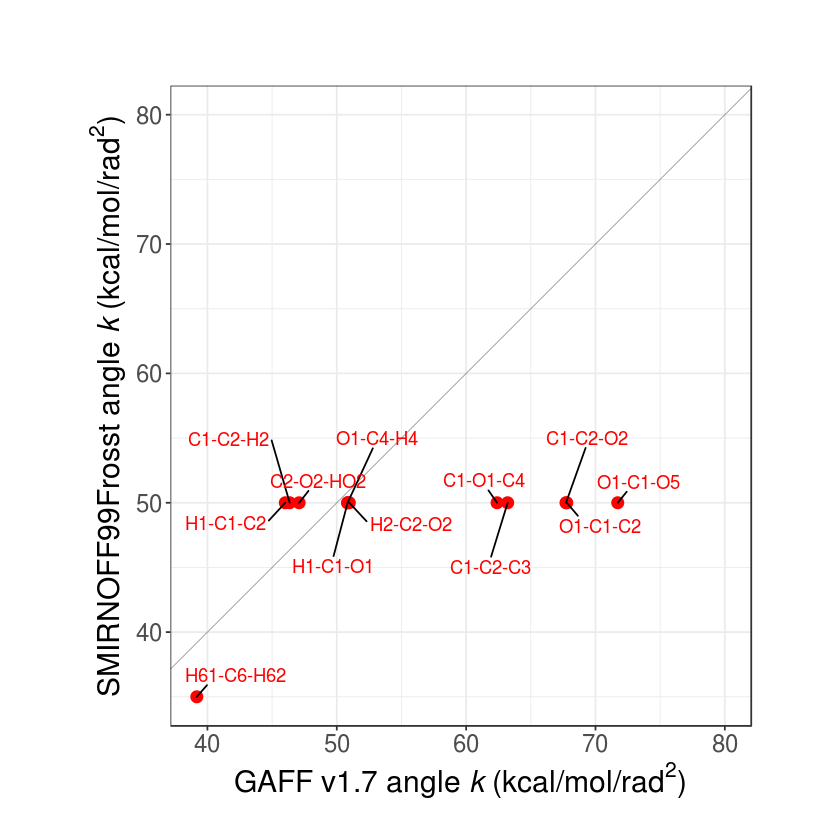

In [7]:
labels <- angles$k_smirnoff == angles$k_bgbg_tip3p
angles$labels <- ""
angles$labels[!labels] <- paste0(angles$atom1[!labels], "-", angles$atom2[!labels], "-", angles$atom3[!labels])

angles %>%
  ggplot(aes(x = k_bgbg_tip3p, y = k_smirnoff, label = labels)) + 
  geom_abline(slope = 1, size = 0.1) +
  geom_point(color = ifelse(labels, "grey50", "red"), size=3) +
  geom_text_repel(color = "red", force = 4, box.padding = 0.6, segment.colour = "black") +
  coord_equal() + 
  xlim(NA, 80) + 
  ylim(NA, 80) +
  labs(subtitle="", 
       x=bquote("GAFF v1.7 angle" ~italic(k)~ "(kcal/mol/" *rad^2* ")"), 
       y=bquote("SMIRNOFF99Frosst angle" ~italic(k)~ "(kcal/mol/" *rad^2* ")"), 
       title="", 
       caption = "")

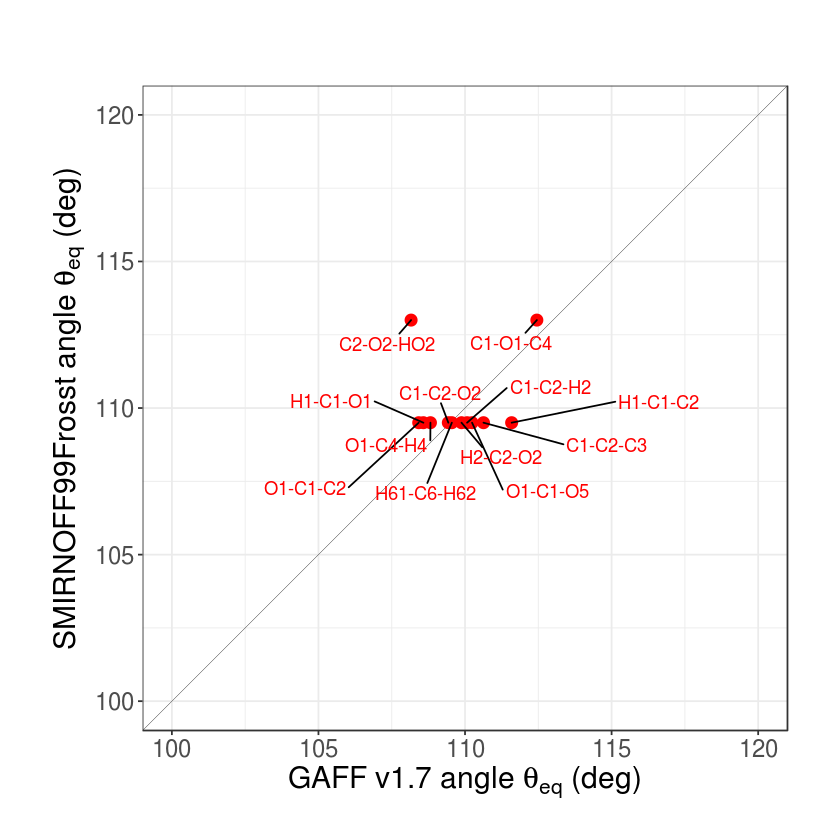

In [15]:
labels <- angles$theta_eq_smirnoff == angles$theta_eq_bgbg_tip3p
angles$labels <- ""
angles$labels[!labels] <- paste0(angles$atom1[!labels], "-", angles$atom2[!labels], "-", angles$atom3[!labels])

angles %>%
  ggplot(aes(x = theta_eq_bgbg_tip3p, y = theta_eq_smirnoff, label = labels)) + 
  geom_abline(slope = 1, size = 0.1) +
  geom_point(color = ifelse(labels, "grey50", "red"), size=3) +
  geom_text_repel(color = "red", force = 4, box.padding = 0.6, segment.colour = "black") +
  coord_equal() + 
  xlim(100, 120) + 
  ylim(100, 120) +
  labs(subtitle="", 
       x=bquote("GAFF v1.7 angle" ~italic(theta)[eq]~ "(deg)"), 
       y=bquote("SMIRNOFF99Frosst angle" ~italic(theta)[eq]~ "(deg)"), 
       title="", 
       caption = "")

# Dihedrals

In [31]:
dihedrals = 
  readr::read_csv("results/dihedrals.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  atom1 = col_character(),
  atom2 = col_character(),
  atom3 = col_character(),
  atom4 = col_character(),
  phi_k_smirnoff = col_double(),
  per = col_integer(),
  phase_smirnoff = col_double(),
  phi_k_bgbg_tip3p = col_double(),
  phase_bgbg_tip3p = col_double()
)


Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”

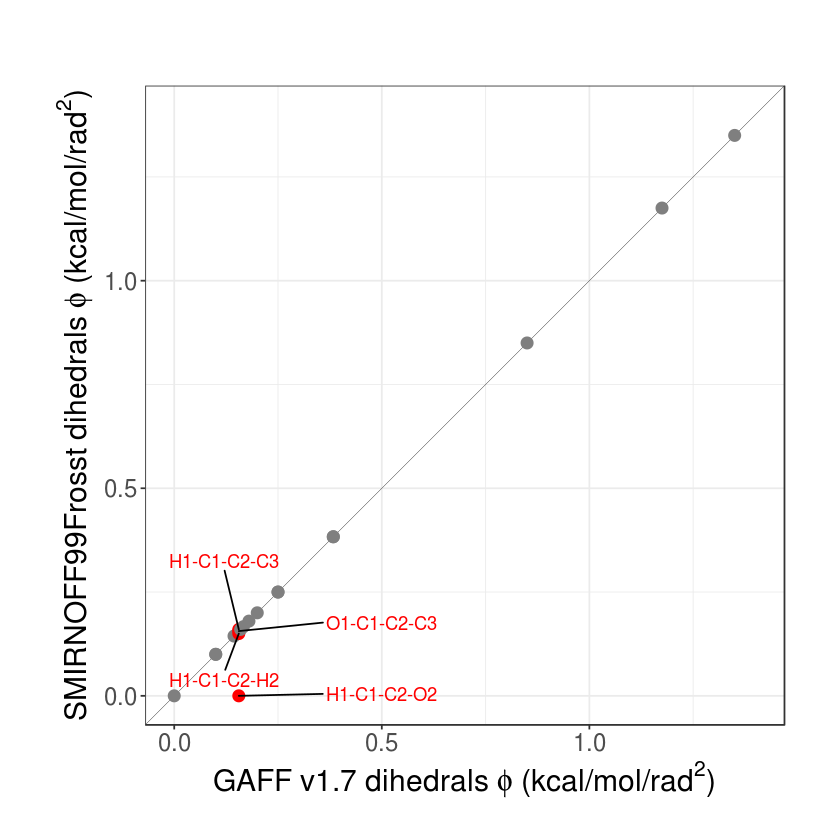

In [34]:
labels <- dihedrals$phi_k_smirnoff == dihedrals$phi_k_bgbg_tip3p
# This will deal with the missing ones.
labels[is.na(labels)] <- TRUE
dihedrals$labels <- ""
dihedrals$labels[!labels] <- paste0(dihedrals$atom1[!labels], "-", dihedrals$atom2[!labels], "-", dihedrals$atom3[!labels], "-",
                                dihedrals$atom4[!labels])

dihedrals %>%
  ggplot(aes(x = phi_k_bgbg_tip3p, y = phi_k_smirnoff, label = labels)) + 
  geom_abline(slope = 1, size = 0.1) +
  geom_point(color = ifelse(labels, "grey50", "red"), size=3) +
  geom_text_repel(color = "red", force = 4, box.padding = 1, segment.colour = "black") +
  coord_equal() + 
  xlim(NA, 1.4) + 
  ylim(NA, 1.4) +
  labs(subtitle="", 
       x=bquote("GAFF v1.7 dihedrals" ~italic(phi)~ "(kcal/mol/" *rad^2* ")"), 
       y=bquote("SMIRNOFF99Frosst dihedrals" ~italic(phi)~ "(kcal/mol/" *rad^2* ")"), 
       title="", 
       caption = "")

In [35]:
dihedrals

X1,atom1,atom2,atom3,atom4,phi_k_smirnoff,per,phase_smirnoff,phi_k_bgbg_tip3p,phase_bgbg_tip3p,labels
0,O1,C1,C2,O2,0.1440000,3,0,0.1440000,0.0000,
576,O1,C1,C2,O2,1.1750000,2,0,1.1750000,0.0000,
1152,O1,C1,C2,C3,0.1560000,3,0,0.1555556,0.0000,O1-C1-C2-C3
1744,O5,C1,C2,O2,1.1750000,2,0,NA,NA,
1748,O5,C1,C2,C3,0.1560000,3,0,NA,NA,
2328,C1,C2,C3,C4,0.1800000,3,0,0.1800000,0.0000,
2904,C1,C2,C3,C4,0.2500000,2,180,0.2500000,180.0001,
3480,C1,C2,C3,C4,0.2000000,1,180,0.2000000,180.0001,
4056,C1,O1,C4,C5,0.3830000,3,0,0.3830000,0.0000,
4456,C1,O1,C4,C5,0.1000000,2,180,0.1000000,180.0001,
